In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('/Users/aditisinha/Downloads/kidney.csv')

In [3]:
dataset.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,1.0,1.0,...,44,7800,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1
1,1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,1.0,1.0,...,38,6000,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1
2,2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,1.0,1.0,...,31,7500,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1
3,3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,0.0,1.0,...,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1
4,4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,1.0,1.0,...,35,7300,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1


In [4]:
dataset.tail()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,395,55.0,80.0,1.020,0.0,0.0,0.0,0.0,1.0,1.0,...,47,6700,4.9,0.0,0.0,0.0,1.0,0.0,0.0,0
396,396,42.0,70.0,1.025,0.0,0.0,0.0,0.0,1.0,1.0,...,54,7800,6.2,0.0,0.0,0.0,1.0,0.0,0.0,0
397,397,12.0,80.0,1.020,0.0,0.0,0.0,0.0,1.0,1.0,...,49,6600,5.4,0.0,0.0,0.0,1.0,0.0,0.0,0
398,398,17.0,60.0,1.025,0.0,0.0,0.0,0.0,1.0,1.0,...,51,7200,5.9,0.0,0.0,0.0,1.0,0.0,0.0,0
399,399,58.0,80.0,1.025,0.0,0.0,0.0,0.0,1.0,1.0,...,53,6800,6.1,0.0,0.0,0.0,1.0,0.0,0.0,0


In [13]:
column_names = dataset.columns

# Print the column names
for column_name in column_names:
    print(column_name)


id
age
bp
sg
al
su
rbc
pc
pcc
ba
bgr
bu
sc
sod
pot
hemo
pcv
wc
rc
htn
dm
cad
appet
pe
ane
classification


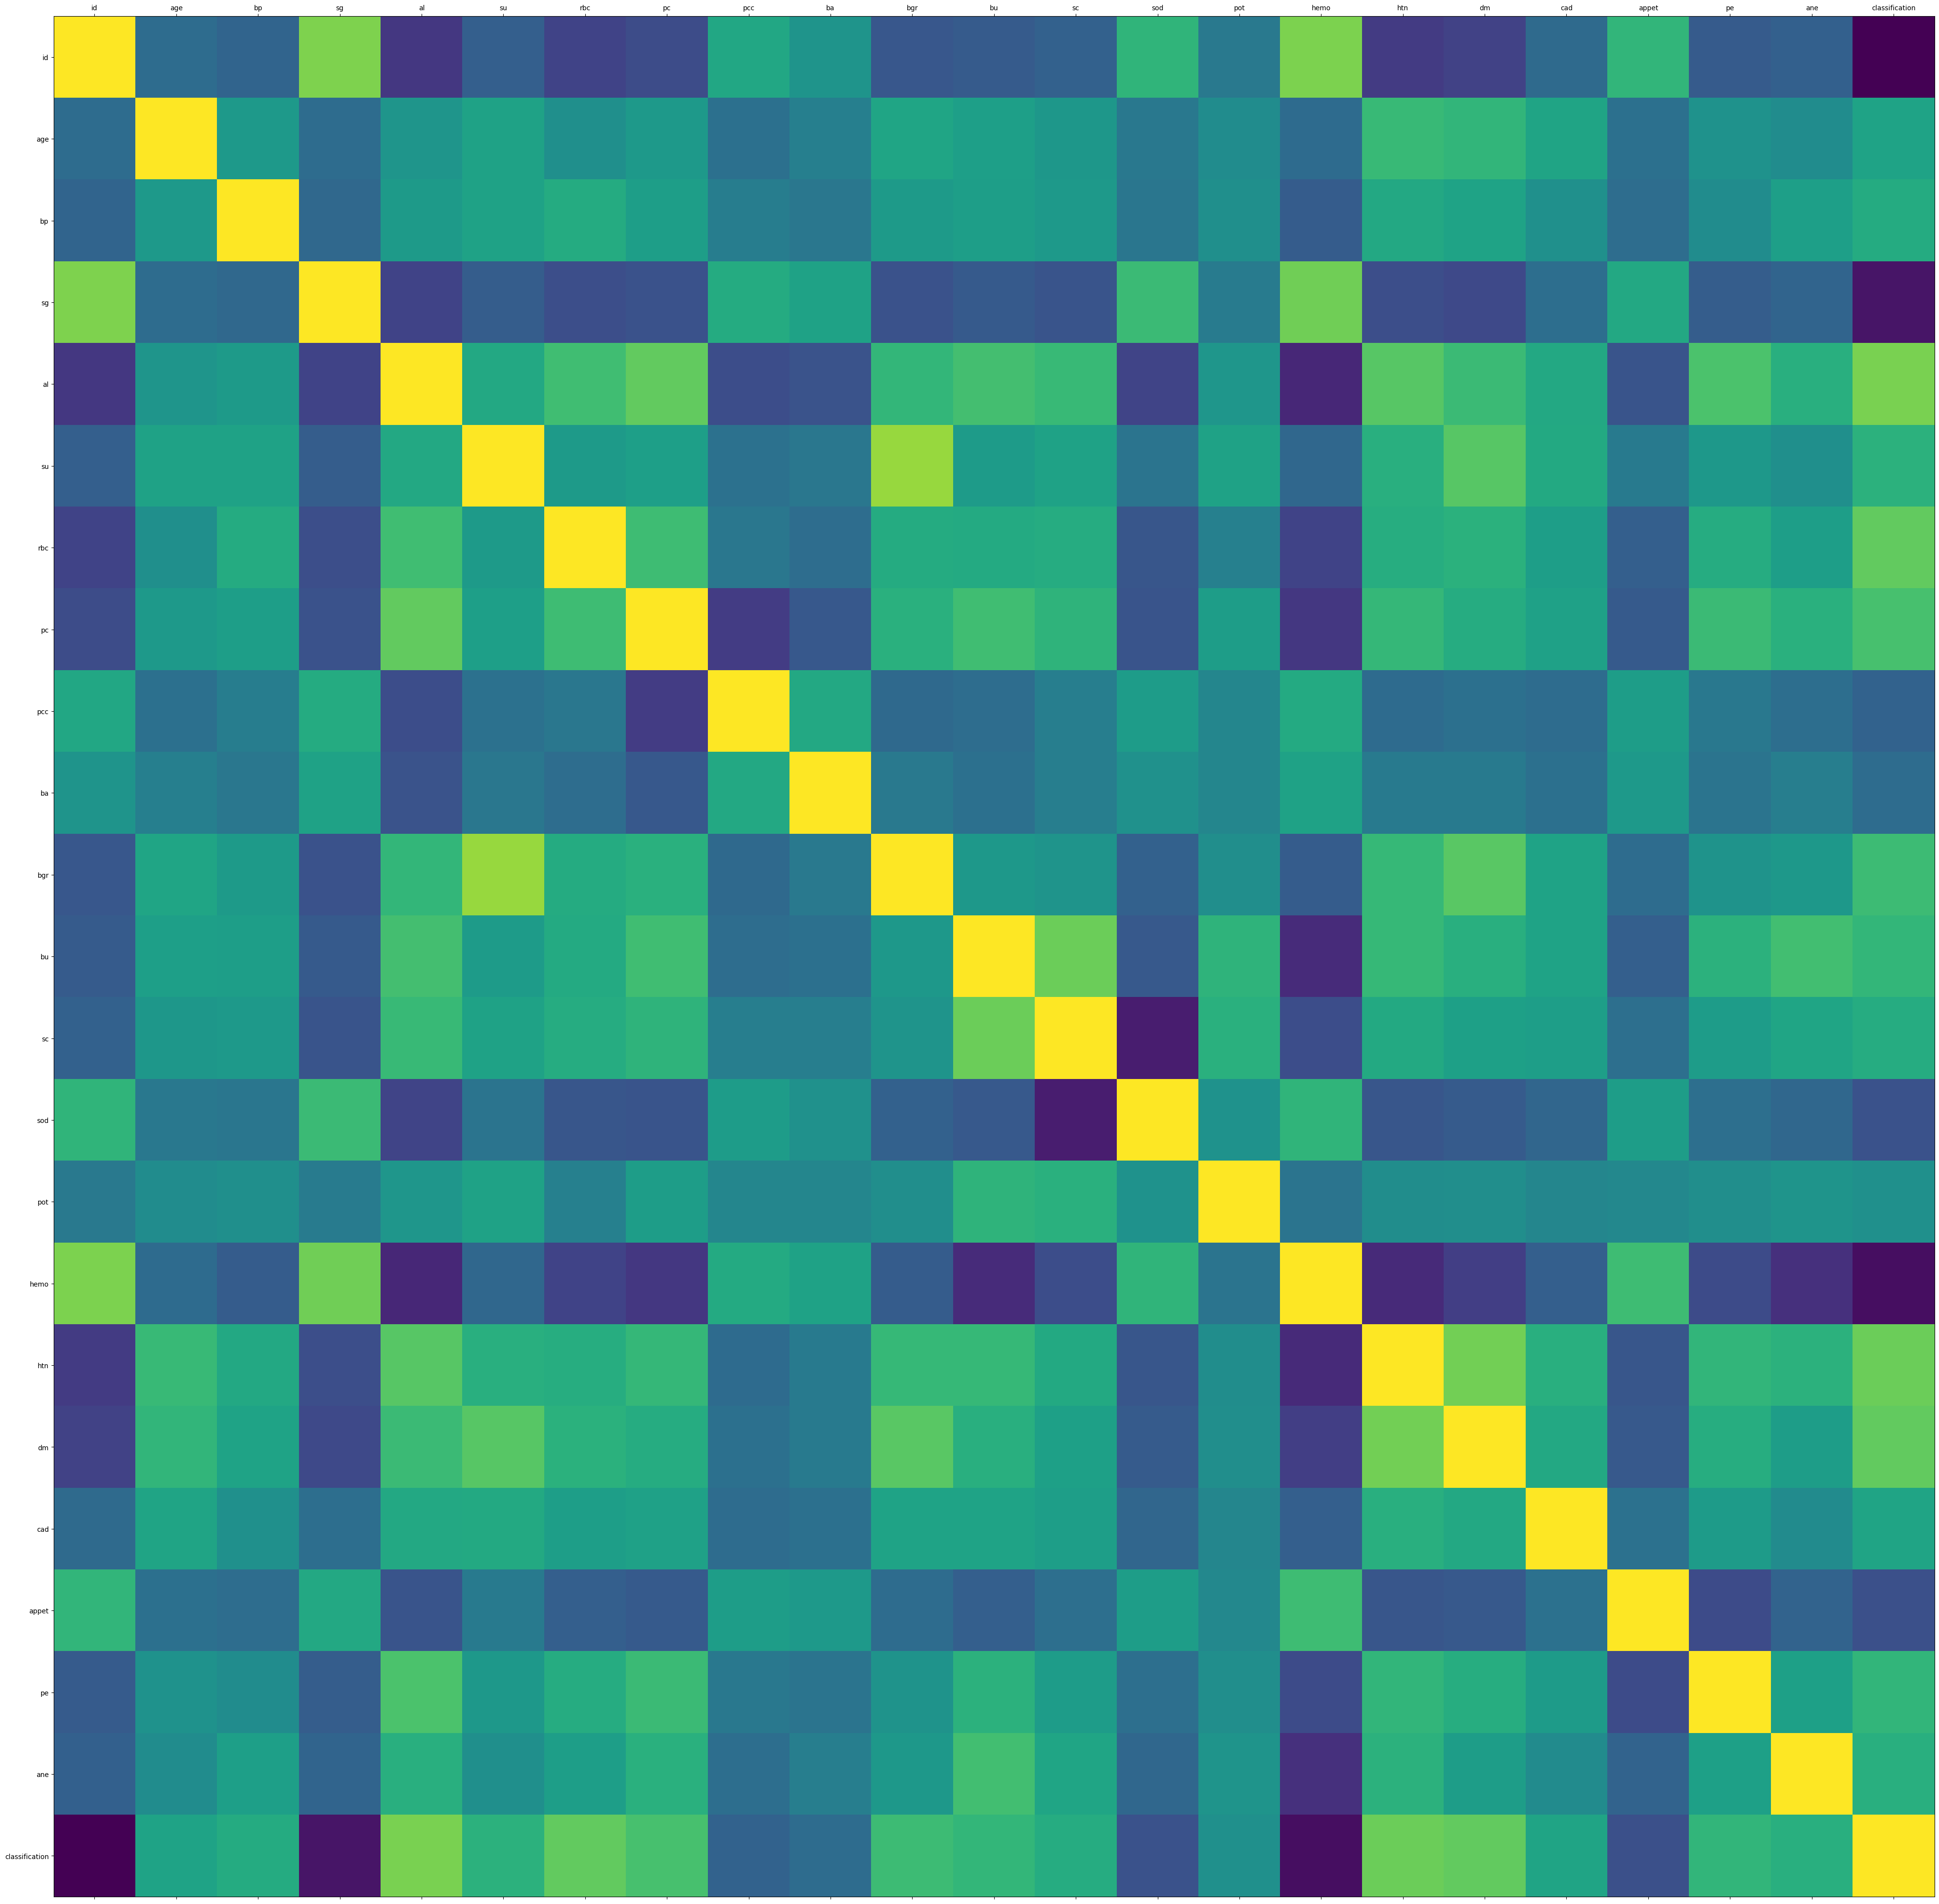

In [14]:
def plot_it(dataframe, size=50):
    corr = dataframe.corr()    # A Dataframe Co-Relation Function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # Color Codes the recangle according to their value
    plt.xticks(range(len(corr.columns)), corr.columns)  
    plt.yticks(range(len(corr.columns)), corr.columns)

plot_it(dataset)

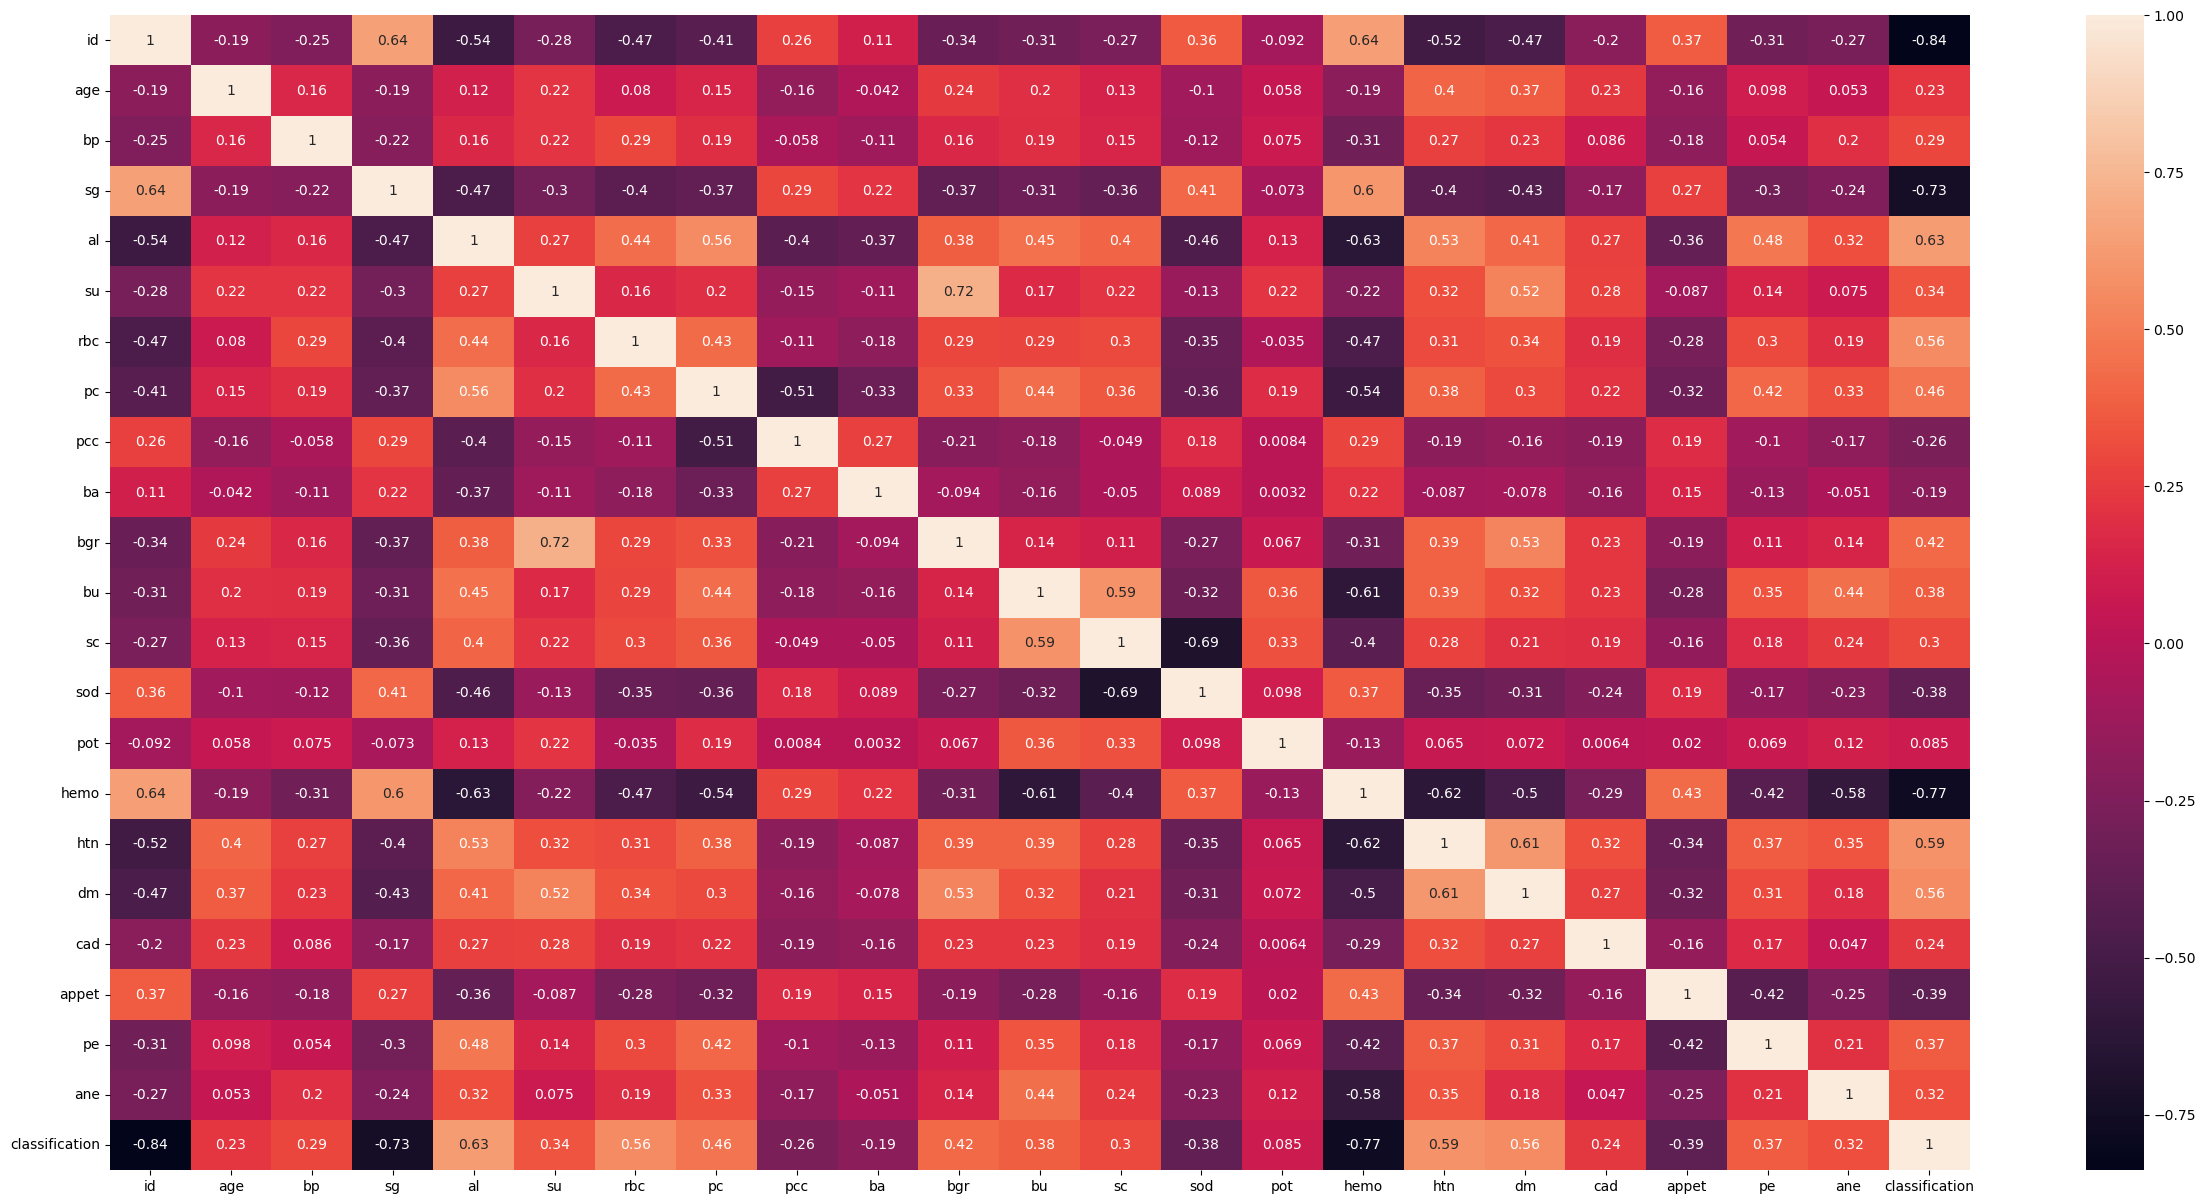

In [15]:
#Lets generate a heat-map to analyze our dataset

plt.figure(figsize=(30,15))
sns.heatmap(dataset.corr(), annot=True) 
plt.show()


In [18]:
#Checking for NULL values in our dataset

dataset.isnull().sum().sum()

1009

In [26]:
#That's a pity! We have now to clean the dataset to get accurate results of our Data Analysis.
# Assuming 'column_name' is the name of the column you want to convert to numeric
dataset=dataset.dropna(axis = 0, how ='any') 
dataset.isnull().values.any()

False

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

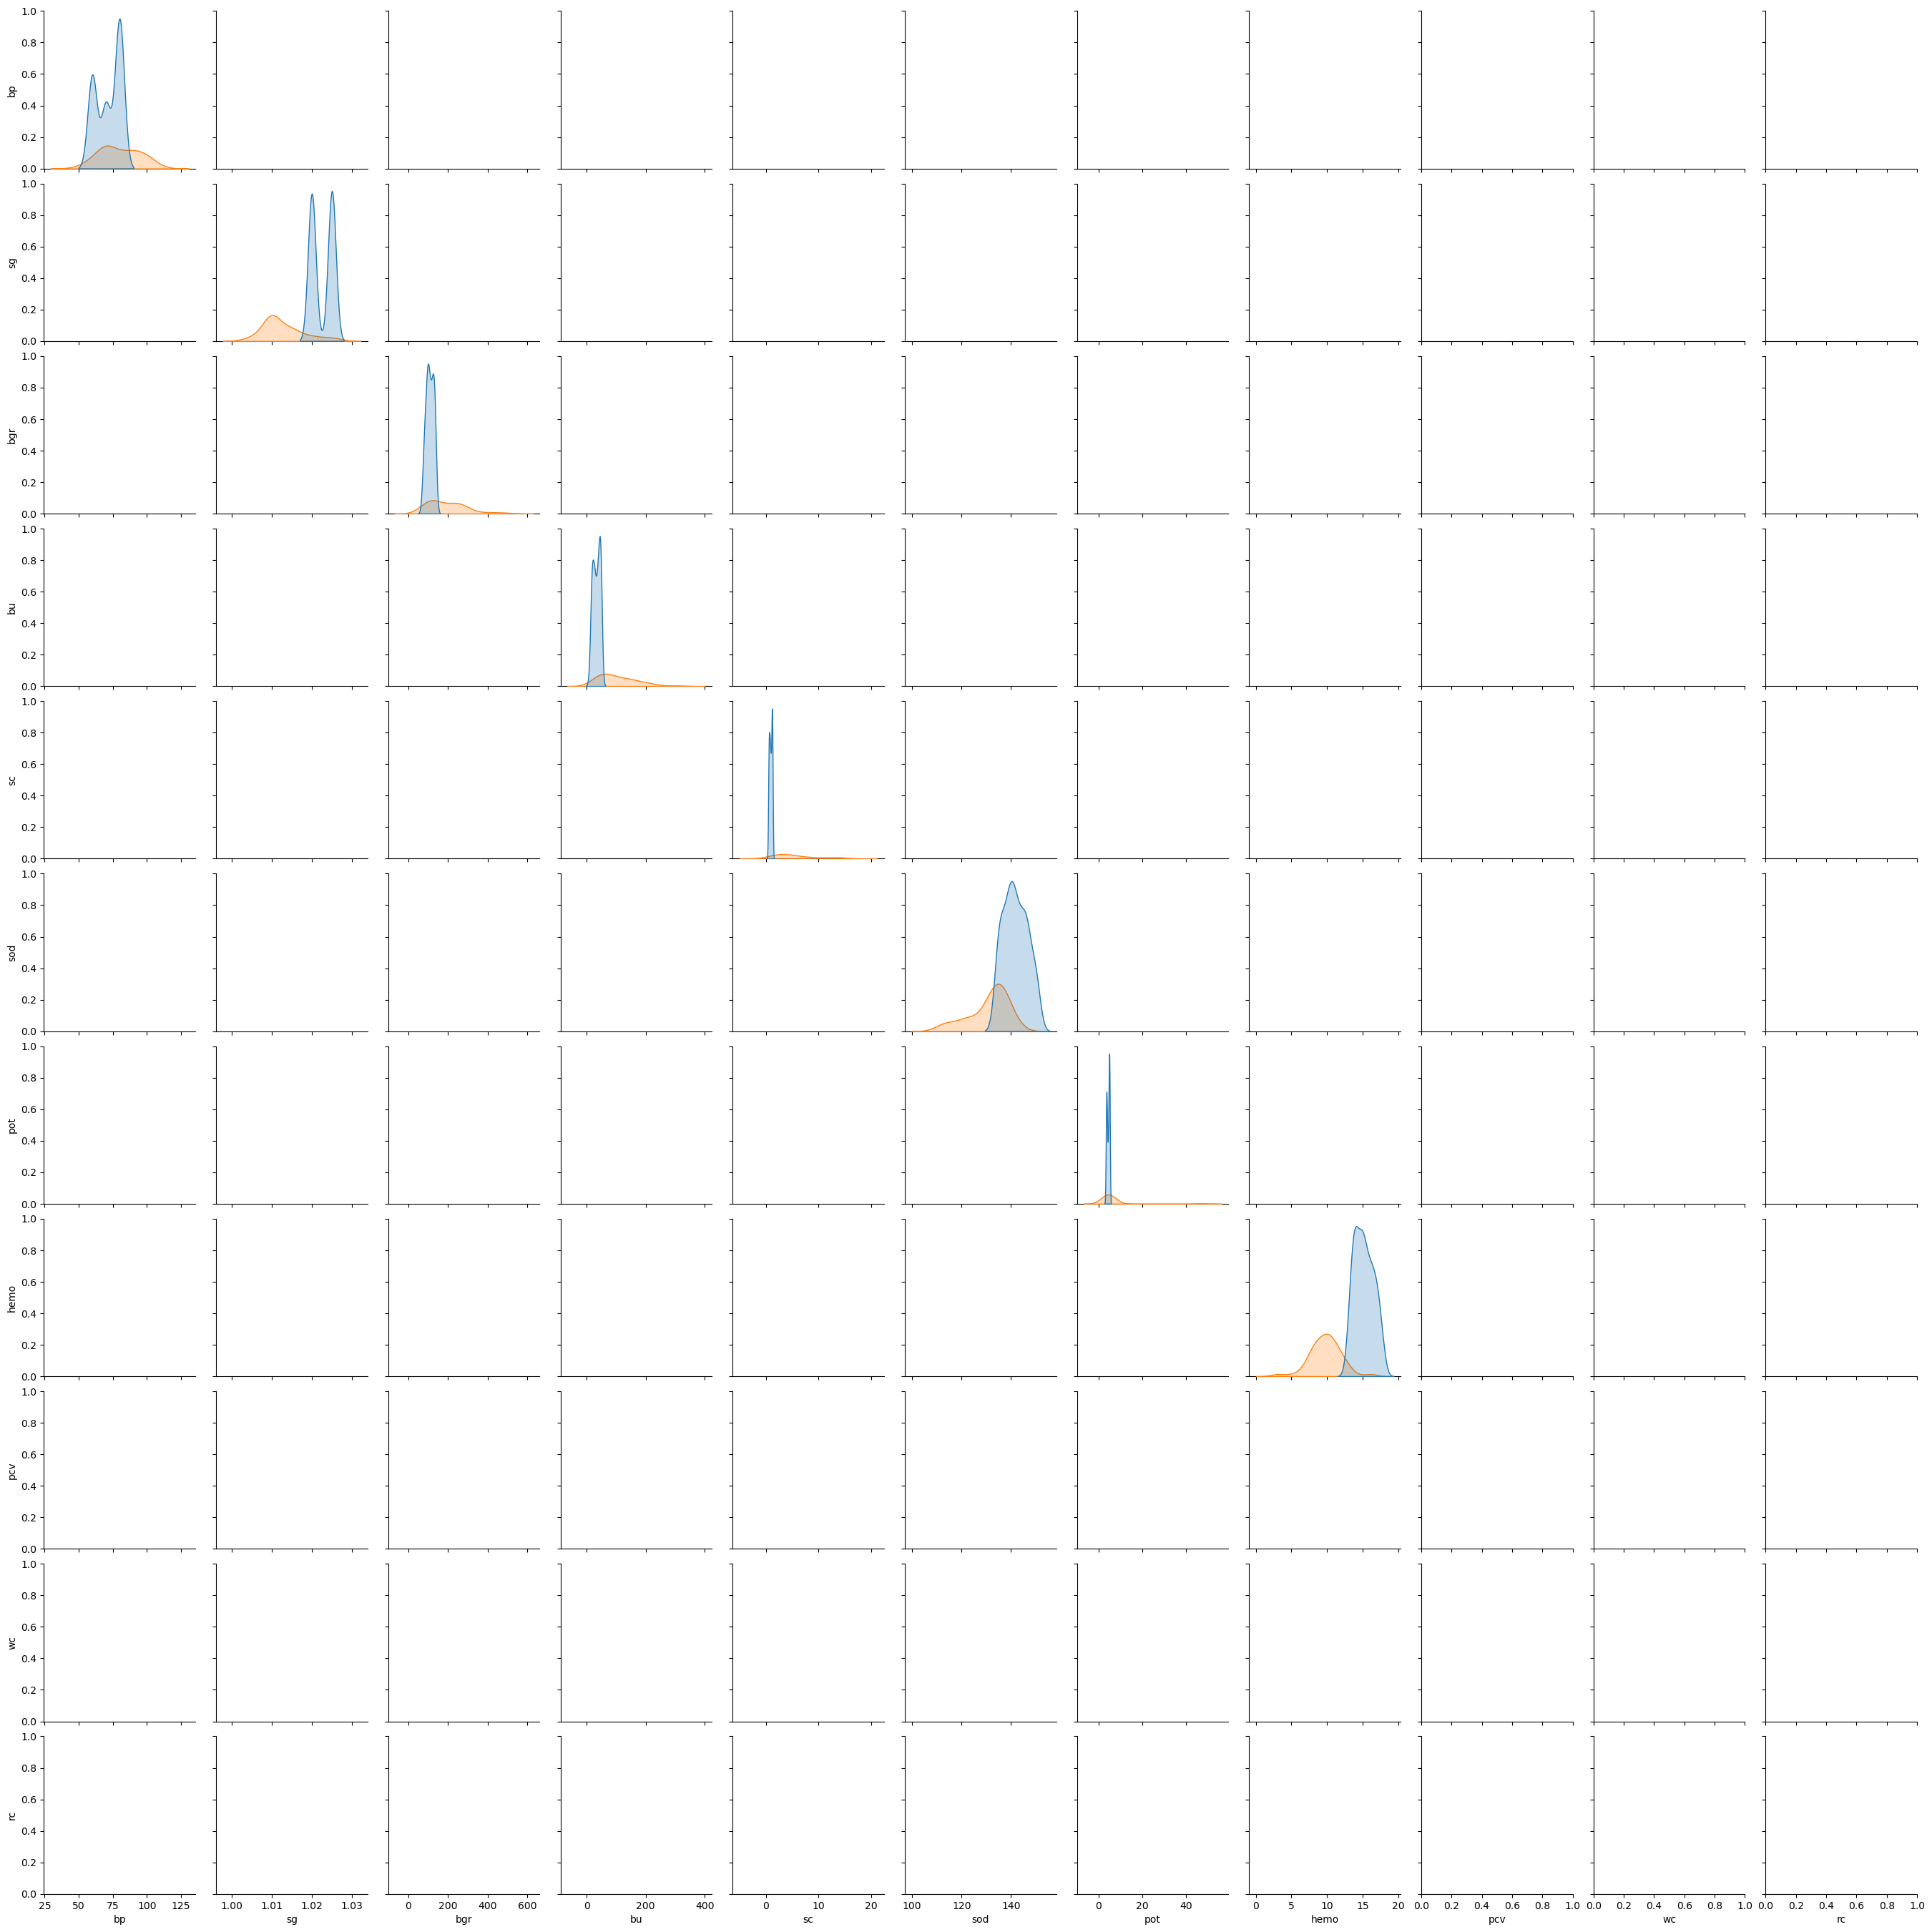

In [30]:
sns.pairplot(dataset, hue='classification', vars=['bp','sg','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc'])
plt.show()

In [31]:
print('Columns of our Dataset: \n',dataset.columns)

Columns of our Dataset: 
 Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')


In [32]:
print('Unique Column Count: \n')
for col in dataset:
    print(len(dataset[col].unique()), col)

Unique Column Count: 

158 id
58 age
7 bp
5 sg
5 al
6 su
2 rbc
2 pc
2 pcc
2 ba
78 bgr
66 bu
39 sc
26 sod
32 pot
80 hemo
34 pcv
71 wc
41 rc
2 htn
2 dm
2 cad
2 appet
2 pe
2 ane
2 classification


In [33]:
dataset.shape

(158, 26)

In [34]:
dataset.describe()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,sod,pot,hemo,htn,dm,cad,appet,pe,ane,classification
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,...,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,274.841772,49.563291,74.050633,1.019873,0.797468,0.253165,0.113924,0.183544,0.911392,0.924051,...,138.848101,4.636709,13.687342,0.215190,0.177215,0.069620,0.879747,0.126582,0.101266,0.272152
std,102.998517,15.512244,11.175381,0.005499,1.413130,0.813397,0.318729,0.388343,0.285080,0.265759,...,7.489421,3.476351,2.882204,0.412261,0.383065,0.255315,0.326292,0.333562,0.302640,0.446483
min,3.000000,6.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,111.000000,2.500000,3.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,243.000000,39.250000,60.000000,1.020000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,135.000000,3.700000,12.600000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,298.500000,50.500000,80.000000,1.020000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,139.000000,4.500000,14.250000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,355.750000,60.000000,80.000000,1.025000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,144.000000,4.900000,15.775000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,399.000000,83.000000,110.000000,1.025000,4.000000,5.000000,1.000000,1.000000,1.000000,1.000000,...,150.000000,47.000000,17.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 3 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              158 non-null    int64  
 1   age             158 non-null    float64
 2   bp              158 non-null    float64
 3   sg              158 non-null    float64
 4   al              158 non-null    float64
 5   su              158 non-null    float64
 6   rbc             158 non-null    float64
 7   pc              158 non-null    float64
 8   pcc             158 non-null    float64
 9   ba              158 non-null    float64
 10  bgr             158 non-null    float64
 11  bu              158 non-null    float64
 12  sc              158 non-null    float64
 13  sod             158 non-null    float64
 14  pot             158 non-null    float64
 15  hemo            158 non-null    float64
 16  pcv             158 non-null    object 
 17  wc              158 non-null    obj

In [36]:
dataset["classification"].unique()


array([1, 0])

0    115
1     43
Name: classification, dtype: int64


/Users/aditisinha/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


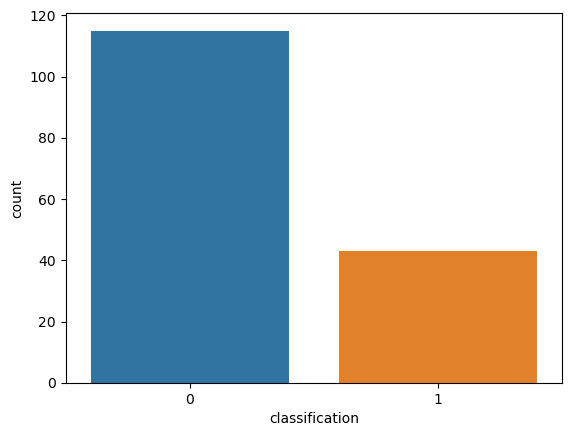

In [37]:
x=dataset["classification"]
sns.countplot(x)
our=dataset.classification.value_counts()
print(our)

/Users/aditisinha/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

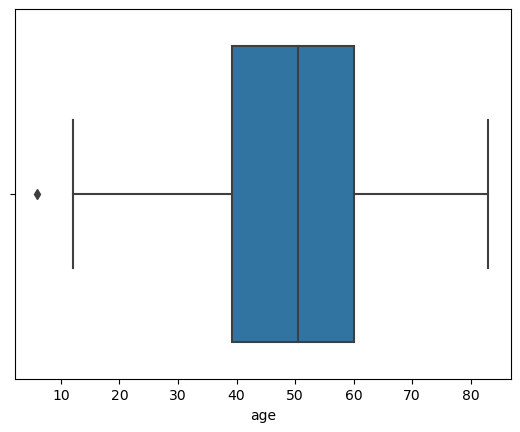

In [38]:
sns.boxplot(dataset["age"])

/Users/aditisinha/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bp'>

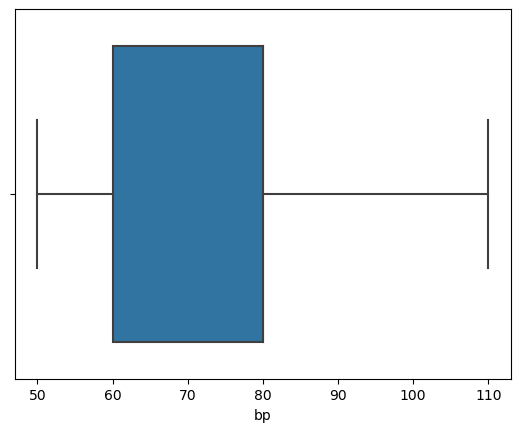

In [39]:
sns.boxplot(dataset["bp"])

/Users/aditisinha/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='al'>

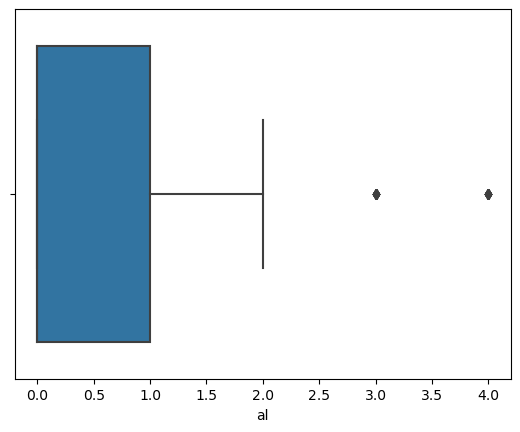

In [40]:
sns.boxplot(dataset["al"])

/Users/aditisinha/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sod'>

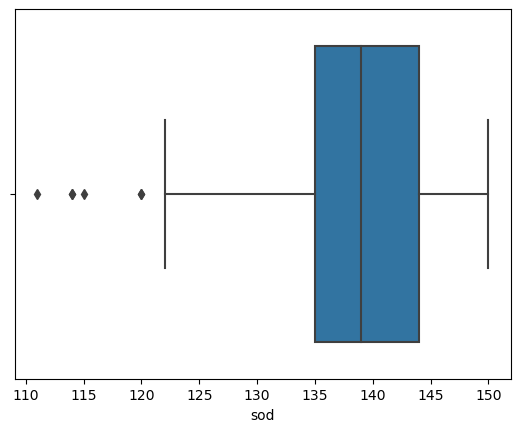

In [41]:
sns.boxplot(dataset["sod"])


/Users/aditisinha/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hemo'>

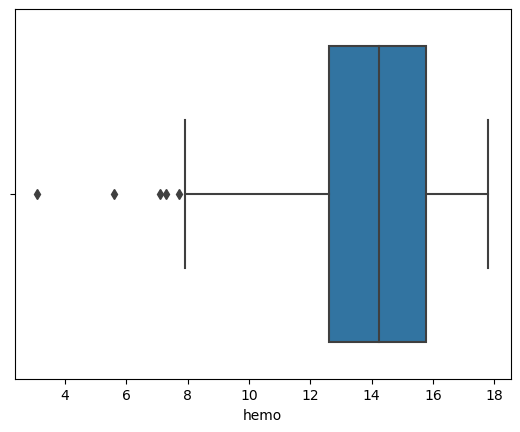

In [42]:
sns.boxplot(dataset["hemo"])

In [43]:
from sklearn.model_selection import train_test_split
to_Predict=dataset.drop("classification",axis=1)
to_Target=dataset["classification"]


In [44]:
#We will split our Dataset into two parts: 70% Data for Training while the rest 30% Data will be used for testing
X_train,X_test,Y_train,Y_test = train_test_split(to_Predict,to_Target,test_size=0.30,random_state=0)

#Hullo! Our Training and Testing Data is prepared!!


In [45]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
logistic_regression=LogisticRegression()
logistic_regression.fit(X_train,Y_train)
predicted=logistic_regression.predict(X_test)

###########################################################

final_score=round(accuracy_score(predicted,Y_test)*100,4)
print("The accuracy of our model implemented through Logistic Regression is %r" %(final_score))

The accuracy of our model implemented through Logistic Regression is 100.0


In [46]:
from sklearn.naive_bayes import GaussianNB
gauss=GaussianNB()
gauss.fit(X_train,Y_train)
predicted=gauss.predict(X_test)

###########################################################

final_score1=round(accuracy_score(predicted,Y_test)*100,4)
print("The accuracy of our model implemented through Naive Bayes is %r" %(final_score1))

The accuracy of our model implemented through Naive Bayes is 100.0


In [47]:
from sklearn import svm
Support_Vector=svm.SVC(kernel="linear")
Support_Vector.fit(X_train,Y_train)
predicted=Support_Vector.predict(X_test)

###########################################################

final_score2=round(accuracy_score(predicted,Y_test)*100,4)
print("The accuracy of our model implemented through Support Vector Classification is %r" %(final_score2))

The accuracy of our model implemented through Support Vector Classification is 100.0


/Users/aditisinha/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Algorithms and Methodologies Used', ylabel='Final Accuracy Scores'>

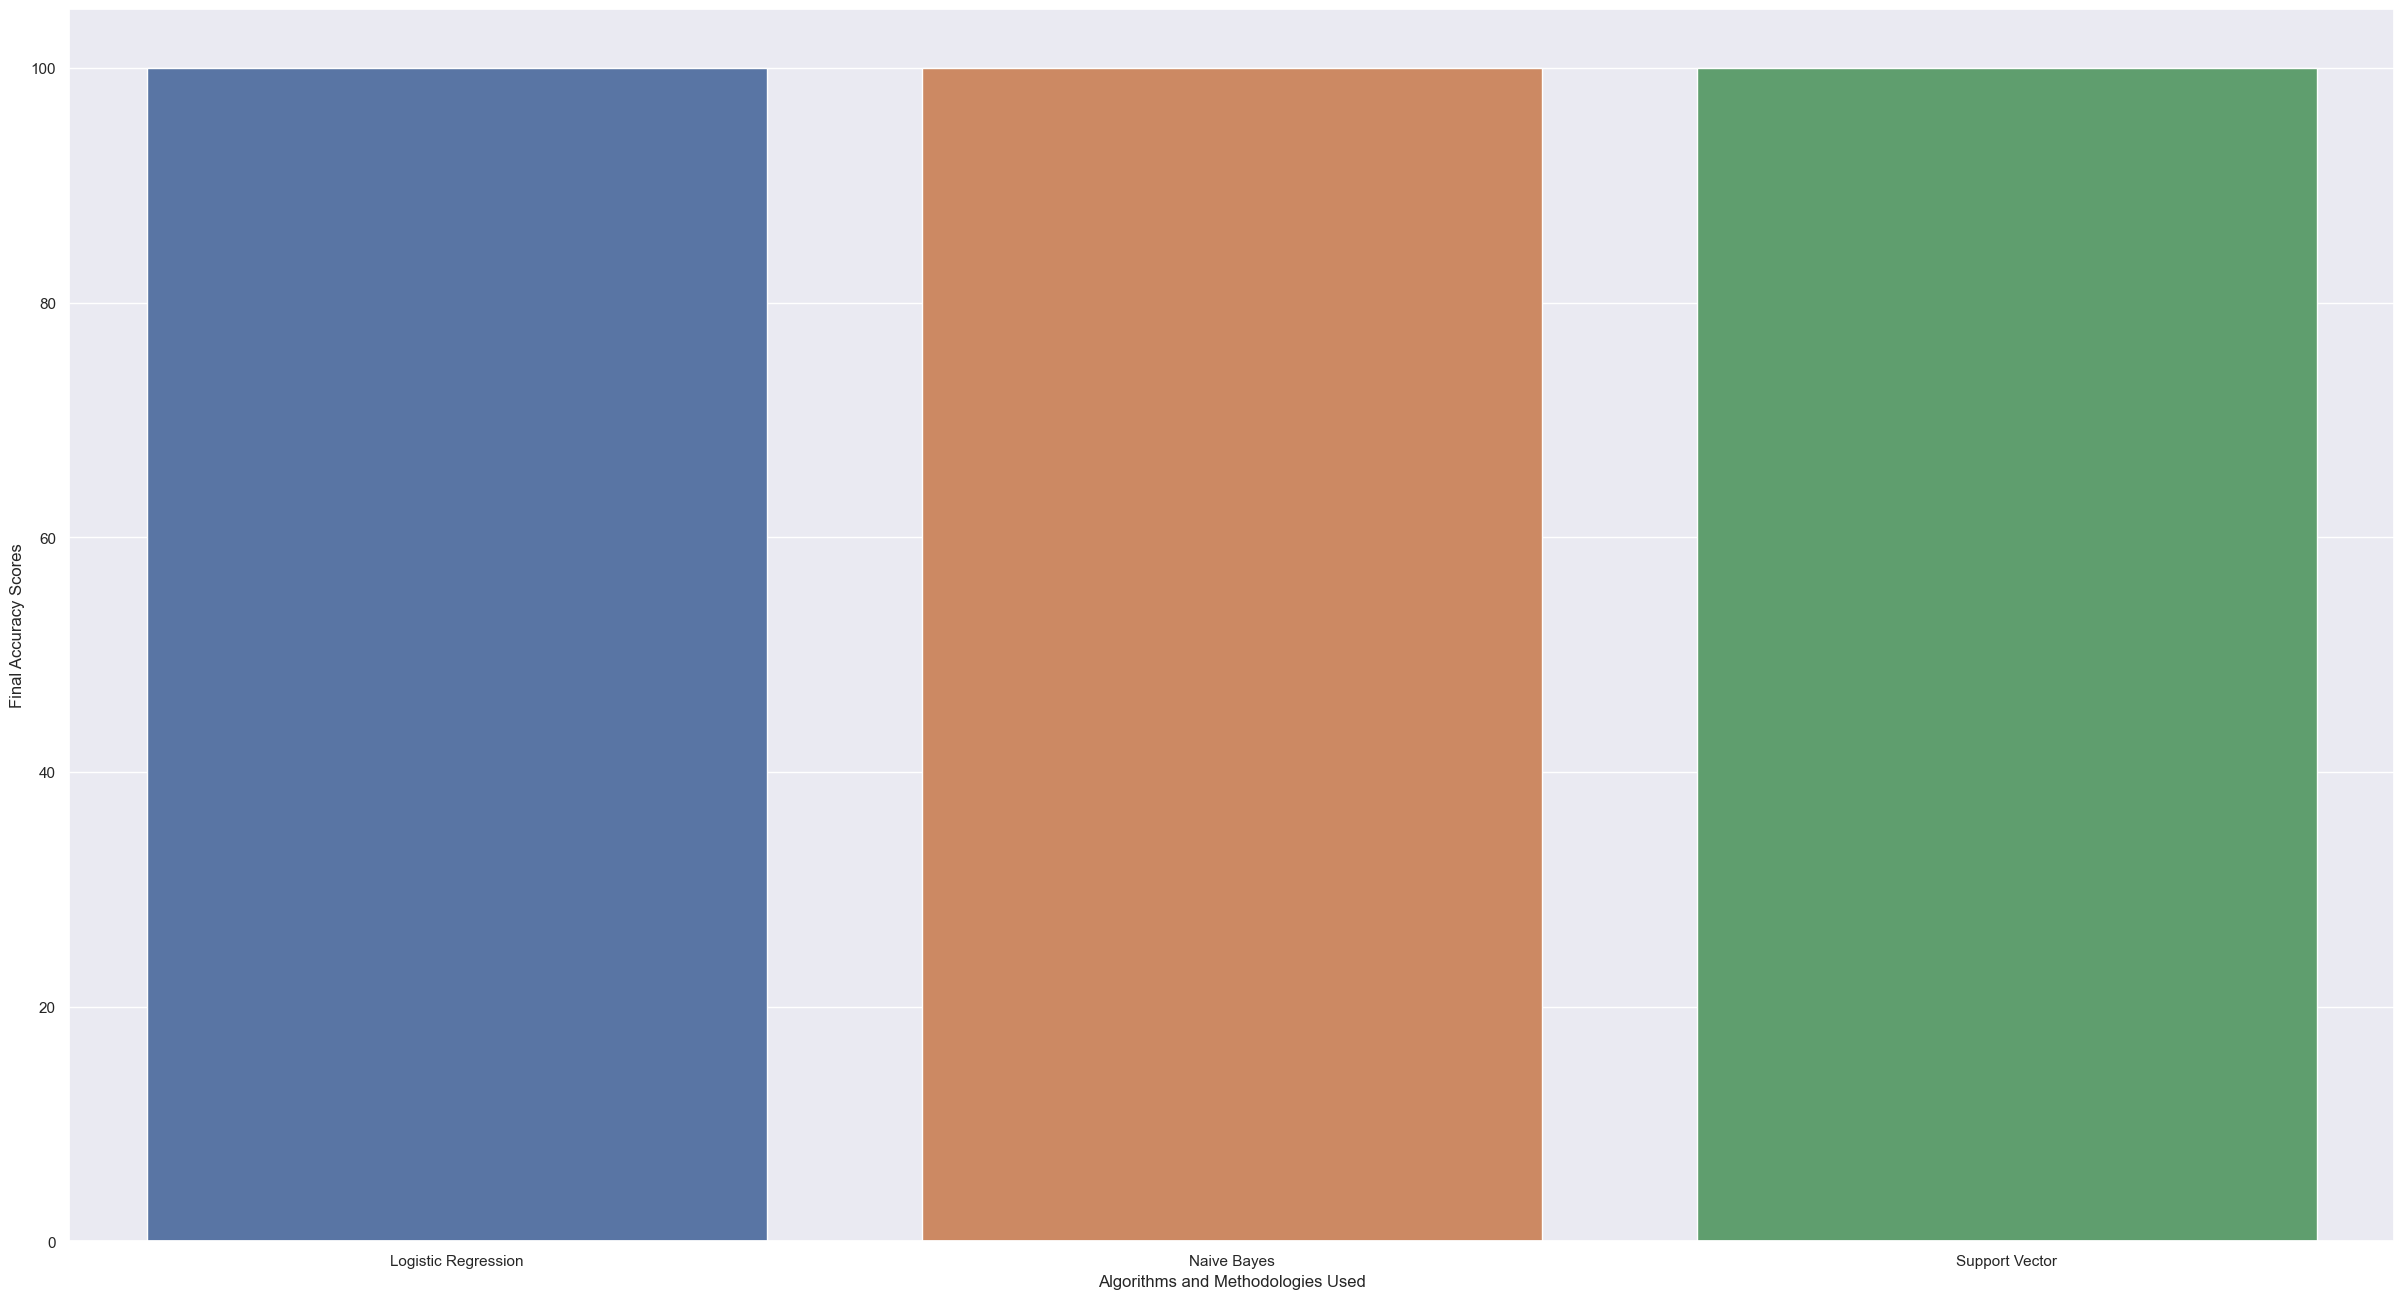

In [48]:
finale=[final_score,final_score1,final_score2]
methods=["Logistic Regression","Naive Bayes","Support Vector"]
sns.set(rc={'figure.figsize':(30,16)})
plt.xlabel("Algorithms and Methodologies Used")
plt.ylabel("Final Accuracy Scores")
sns.barplot(methods,finale)

In [49]:
from sklearn.metrics import confusion_matrix
hinata=logistic_regression.predict(X_test)
sakura=Y_test
matrix=confusion_matrix(sakura,hinata)

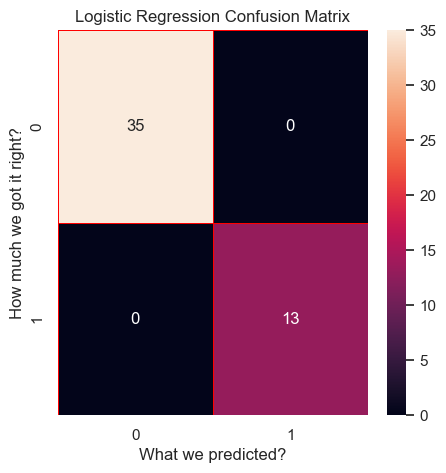

In [50]:
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(matrix,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("What we predicted?")
plt.ylabel("How much we got it right?")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

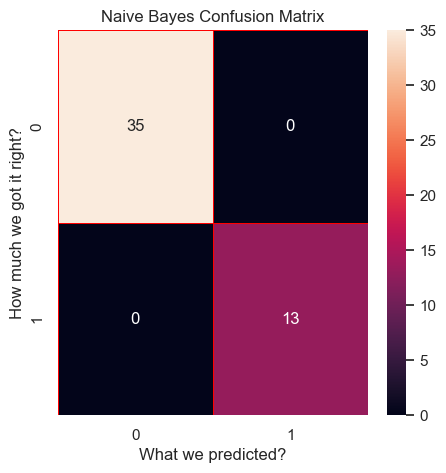

In [51]:
hinata=gauss.predict(X_test)
sakura=Y_test
matrix=confusion_matrix(sakura,hinata)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(matrix,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("What we predicted?")
plt.ylabel("How much we got it right?")
plt.title("Naive Bayes Confusion Matrix")
plt.show()

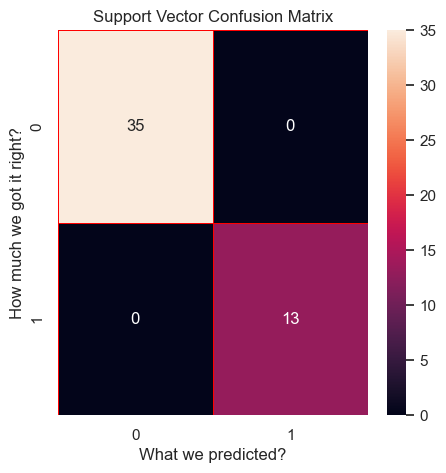

In [52]:
hinata=Support_Vector.predict(X_test)
sakura=Y_test
matrix=confusion_matrix(sakura,hinata)

f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(matrix,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("What we predicted?")
plt.ylabel("How much we got it right?")
plt.title("Support Vector Confusion Matrix")
plt.show()

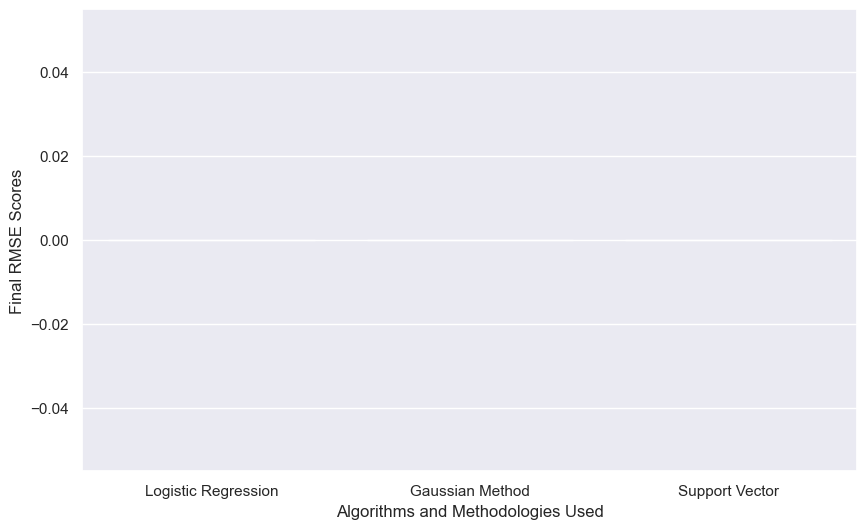

In [55]:
#Calculating Root-Mean Squared Error
# Import necessary libraries
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate RMSE for each algorithm
Y_pred_lr = logistic_regression.predict(X_test)
Y_pred_rf = gauss.predict(X_test)
Y_pred_svm = Support_Vector.predict(X_test)

rmse_lr = sqrt(mean_squared_error(Y_test, Y_pred_lr))
rmse_svm = sqrt(mean_squared_error(Y_test, Y_pred_svm))
rmse_gauss = sqrt(mean_squared_error(Y_test, Y_pred_rf))

rmse_scores = [rmse_lr, rmse_gauss, rmse_svm]

# Define the names of algorithms/methodologies
methods = ["Logistic Regression", "Gaussian Method", "Support Vector"]

# Create a bar plot
sns.set(rc={'figure.figsize': (10, 6)})
plt.xlabel("Algorithms and Methodologies Used")
plt.ylabel("Final RMSE Scores")
sns.barplot(x=methods, y=rmse_scores)

# Display the plot
plt.show()
